Martha Czernuszenko, Daniel Madden, Jasmine Diep, and Ross Timm

In [194]:
#import necessary packages and load the dataset

from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv('Dockless_Vehicle_Trips.csv', dtype=unicode)
df.head()


Populating the interactive namespace from numpy and matplotlib


,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,5,5,9,013445,013916,2018,30.263,-97.762,30.259,-97.754
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,5,9,9,014556,015186,2018,30.283,-97.745,30.284,-97.737
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,2,9,9,015344,015032,2018,30.285,-97.734,30.291,-97.738
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,0,9,9,014707,014081,2018,30.268,-97.743,30.276,-97.752
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,5,3,3,016114,015642,2018,30.242,-97.721,30.244,-97.729


In [195]:
#Summarize the dataset
print df.columns.values
len(df.index)

3973614

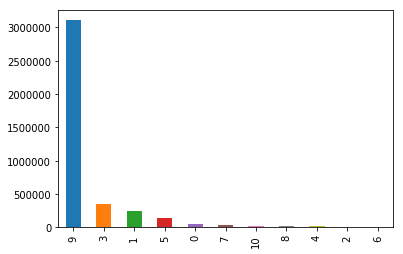

In [196]:
#Plot the frequency of rides starting in each Council District
df['Council District (Start)'].value_counts().plot(kind = 'bar')

scooter    3817269
bicycle     156344
Name: Vehicle Type, dtype: int64


Text(0.5,0,'Vehicle Type')

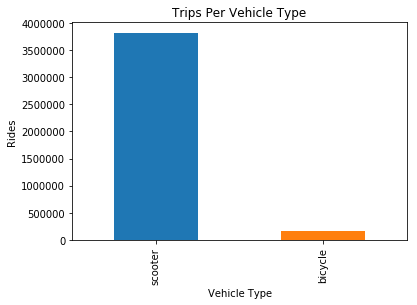

In [197]:
#Plot the difference in rides for scooters and bikes
vehicle_vc = df['Vehicle Type'].value_counts()
print vehicle_vc
ax1 = vehicle_vc.plot(kind = 'bar')
ax1.set_title('Trips Per Vehicle Type')
ax1.set_ylabel('Rides')
ax1.set_xlabel('Vehicle Type')

In [230]:
#Determine the average trip duration by vehicle type
df_by_vehicle = df
df_by_vehicle['Trip Duration'] = (df_by_vehicle['Trip Duration']).astype('int64')
times_by_vehicle = df_by_vehicle.groupby(['Vehicle Type'])['Trip Duration'].agg(['mean', 'count'])
times_by_vehicle

,mean,count
Vehicle Type,,
bicycle,1204.233197,156344
scooter,660.021517,3817269


In [198]:
#Copy columns in the dataframe to rename them
df["Start Date and Time"] = df["Start Time"]
df["End Date and Time"] = df["End Time"]

In [199]:
#Remove just the date from the from the column containing date and time and add a column with the date to the dataframe

def get_date(full_time):
    
    day_time_list = str(full_time).split()
    return day_time_list[0]

df["Start Date and Time"] = df["Start Time"]
df["End Date and Time"] = df["End Time"]

df["Start Date"] = df["Start Date and Time"].map(get_date)
df["End Date"] = df["End Date and Time"].map(get_date)
df.head()

# df['Start Date'].value_counts().plot(kind = 'bar')

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,Start Date and Time,End Date and Time,Start Date,End Date
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,013916,2018,30.263,-97.762,30.259,-97.754,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,06/29/2018,06/29/2018
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,015186,2018,30.283,-97.745,30.284,-97.737,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11/30/2018,11/30/2018
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,015032,2018,30.285,-97.734,30.291,-97.738,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10/02/2018,10/02/2018
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,014081,2018,30.268,-97.743,30.276,-97.752,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,09/02/2018,09/02/2018
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,015642,2018,30.242,-97.721,30.244,-97.729,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,09/28/2018,09/28/2018


In [200]:
#Checks to make sure dates were re-written correctly
def get_length(date):
    return len(str(date).split())

df['Length Date Time'] = df['Start Date and Time'].map(get_length)
df['Length Date Time'].value_counts()

mask_date = df['Length Date Time'] == 3
df = df[mask_date]
df['Length Date Time'].value_counts()

3    3973613
Name: Length Date Time, dtype: int64

In [201]:
#Defines a function that adds a column to the dataframe for the time of the ride

def get_time(full_time):
    
    day_time_list = str(full_time).split()
    time =  day_time_list[-2] + " " + day_time_list[-1]
    return time

df["Start Time Fixed"] = df["Start Date and Time"].map(get_time)
df["End Time Fixed"] = df["End Date and Time"].map(get_time)
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,Start Longitude,End Latitude,End Longitude,Start Date and Time,End Date and Time,Start Date,End Date,Length Date Time,Start Time Fixed,End Time Fixed
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,-97.762,30.259,-97.754,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,06/29/2018,06/29/2018,3,05:30:00 PM,05:30:00 PM
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,-97.745,30.284,-97.737,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11/30/2018,11/30/2018,3,11:00:00 AM,11:00:00 AM
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,-97.734,30.291,-97.738,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10/02/2018,10/02/2018,3,03:15:00 PM,03:30:00 PM
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,-97.743,30.276,-97.752,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,09/02/2018,09/02/2018,3,04:45:00 PM,05:00:00 PM
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,-97.721,30.244,-97.729,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,09/28/2018,09/28/2018,3,11:45:00 AM,11:45:00 AM


In [202]:
#Defines a function that adds a column to the dataframe for whether the ride occurred in AM or PM

def get_am_pm(date):
    day_time_list = str(date).split()
    time =  day_time_list[-1]
    return time

df["Start AM PM"] = df["Start Date and Time"].map(get_am_pm)
df["End AM PM"] = df["End Date and Time"].map(get_am_pm)
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,End Longitude,Start Date and Time,End Date and Time,Start Date,End Date,Length Date Time,Start Time Fixed,End Time Fixed,Start AM PM,End AM PM
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,-97.754,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,06/29/2018,06/29/2018,3,05:30:00 PM,05:30:00 PM,PM,PM
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,-97.737,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11/30/2018,11/30/2018,3,11:00:00 AM,11:00:00 AM,AM,AM
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,-97.738,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10/02/2018,10/02/2018,3,03:15:00 PM,03:30:00 PM,PM,PM
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,-97.752,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,09/02/2018,09/02/2018,3,04:45:00 PM,05:00:00 PM,PM,PM
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,-97.729,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,09/28/2018,09/28/2018,3,11:45:00 AM,11:45:00 AM,AM,AM


In [203]:
#Checks the number of trips for each vehicle type
df['Vehicle Type'].value_counts()

scooter    3817269
bicycle     156344
Name: Vehicle Type, dtype: int64

In [204]:
#Adds a column to the dataframe for the route that the trip took based on start and end council district
df['From To District'] = df['Council District (Start)'] + " " + df['Council District (End)']
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,Start Date and Time,End Date and Time,Start Date,End Date,Length Date Time,Start Time Fixed,End Time Fixed,Start AM PM,End AM PM,From To District
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,06/29/2018,06/29/2018,3,05:30:00 PM,05:30:00 PM,PM,PM,5 9
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11/30/2018,11/30/2018,3,11:00:00 AM,11:00:00 AM,AM,AM,9 9
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10/02/2018,10/02/2018,3,03:15:00 PM,03:30:00 PM,PM,PM,9 9
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,09/02/2018,09/02/2018,3,04:45:00 PM,05:00:00 PM,PM,PM,9 9
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,09/28/2018,09/28/2018,3,11:45:00 AM,11:45:00 AM,AM,AM,3 3


In [257]:
#Analyzes data trends related to Austin City Limits (ACL) traffic

October_mask = df['Month'] == '10'
October_mask

October = df[October_mask]
October

count_October = len(October)
count_October

#Because ACL occurs within District 5, rides must start or end in that district to be considered related to ACL
loc_October_mask = (October['Council District (End)'] =='5') | (October['Council District (Start)'] == '5')

loc_October = October[loc_October_mask]
loc_October

count_loc_October = len(loc_October)
count_loc_October


#Check to see if a trip occurred during the dates of ACL
def getACL(s):
    splitdate = s.split("/")
    day = splitdate[1]
    day = int(day)
    if day == 5 or day == 6 or day ==7 or day == 12 or day ==13 or day == 14:
        return day

ACL = loc_October['Start Date'].map(getACL).dropna()
loc_October['ACL'] = ACL

count_ACL = len(ACL)
count_ACL


#Get a random day to serve as a point of comparison for the traffic during ACL in District 5: 


April_mask = df['Month'] == '4'
April_mask

April = df[April_mask]
April

count_April = len(April)
count_April

loc_April_mask = (April['Council District (End)'] =='5') | (April['Council District (Start)'] == '5')
loc_April = April[loc_April_mask]
loc_April

random_day = loc_April['Start Date'].value_counts()

average = random_day.mean()
average

#Compare the ACL traffic to the "typical" traffic based on the average date, both in volume and in percent

only_ACL  = count_ACL - average*6
print only_ACL

ACLPercent = only_ACL / count_October
ACLPercent

C:\Users\dtmad\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


23115.4444444


0.045564732499742654

In [265]:
#Summarize stats for ACL rides

# loc_October
acl_mask = loc_October['ACL'].notnull()
loc_October = loc_October[acl_mask]
loc_October.head()
mean_duration = loc_October['Trip Duration'].mean()

# mean_price = loc_October['Expected Price'].mean()

# total_price = loc_October['Expected Price'].sum()

count = len(loc_October)

print mean_duration
# print mean_price
# print total_price
print count

896.952934267
23839


In [259]:
#Analyze the data for trends related to SXSW

#Reduce the dataset to trips that occurred within District 9 between the dates of March 8th and March 17th 
# as this matches the time and location of SXSW
March_mask = df['Month'] == '3'
March_mask

March = df[March_mask]
March

count_March = len(March)
count_March

loc_March_mask = (March['Council District (End)'] =='9') & (March['Council District (Start)'] == '9')
loc_March = March[loc_March_mask]
loc_March

count_loc_March = len(loc_March)
count_loc_March

def getSXSW(s):
    splitdate = s.split("/")
    day = splitdate[1]
    day = int(day)
    if day >=8 and day <= 17:
        return day

SXSW = loc_March['Start Date'].map(getSXSW).dropna()
loc_March['SXSW'] = SXSW

count_SXSW = len(SXSW)
count_SXSW


#Get a random day to serve as a point of comparison for the traffic during SXSW in District 9: 


April_mask = df['Month'] == '4'
April_mask

April = df[April_mask]
April

count_April = len(April)
count_April

loc_April_mask = (April['Council District (End)'] =='9') & (April['Council District (Start)'] == '9')
loc_April = April[loc_April_mask]
loc_April

#Getting average rides per day

random_day = loc_April['Start Date'].value_counts()
random_day

average = random_day.mean()
average

#Compare the SXSW traffic to the "typical" traffic based on the average date, both in volume and in percent

only_SXSW  = count_SXSW - average*10
print only_SXSW

SXSWPercent = only_SXSW / count_March
SXSWPercent


C:\Users\dtmad\Anaconda2\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


285265.642857


0.3405095759496358

In [260]:
print len(loc_March)
print count_SXSW

556078
310571


In [264]:
#Summarize stats for SXSW rides


sxsw_mask = loc_March['SXSW'].notnull()
loc_March = loc_March[sxsw_mask]
loc_March.head()
mean_duration = loc_March['Trip Duration'].mean()

# mean_price = loc_March['Expected Price'].mean()

# total_price = loc_March['Expected Price'].sum()

count = len(loc_March)

print mean_duration
print count

678.007112705
310571


In [11]:
#Determine the most frequent routes in terms of districts
df['From To District'].value_counts()

9 9      2770769
3 3       221536
9 1       136865
1 9       114617
9 3       113824
1 1       110610
3 9        99966
5 5        80496
9 5        54456
5 9        41922
7 7        31691
0 9        18458
3 1        16649
0 0        16338
10 10      15736
1 3        14467
8 8        11750
9 0        10991
4 4        10646
9 8         8141
9 10        8073
10 9        5719
8 9         5165
5 8         4547
8 5         4297
3 5         4248
5 3         3852
2 2         3789
9 4         3631
9 7         2365
          ...   
3 4           64
10 4          46
2 0           44
4 10          42
3 7           42
7 6           40
4 3           36
0 2           30
5 4           25
6 0           22
7 3           21
5 7           19
6 9           18
6 7           13
7 5           13
1 2           13
9 6           10
2 1            9
2 8            8
10 6           8
4 5            8
6 10           7
0 6            7
8 2            5
10 2           3
2 4            2
4 6            1
6 1           

In [12]:
#Determine which rides start and end within the same district
df['Same District'] = df['Council District (Start)'] == df['Council District (End)']
df.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,End Date and Time,Start Date,End Date,Length Date Time,Start Time Fixed,End Time Fixed,Start AM PM,End AM PM,From To District,Same District
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,06/29/2018 05:30:00 PM,06/29/2018,06/29/2018,3,05:30:00 PM,05:30:00 PM,PM,PM,5 9,False
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,11/30/2018 11:00:00 AM,11/30/2018,11/30/2018,3,11:00:00 AM,11:00:00 AM,AM,AM,9 9,True
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,10/02/2018 03:30:00 PM,10/02/2018,10/02/2018,3,03:15:00 PM,03:30:00 PM,PM,PM,9 9,True
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,09/02/2018 05:00:00 PM,09/02/2018,09/02/2018,3,04:45:00 PM,05:00:00 PM,PM,PM,9 9,True
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,09/28/2018 11:45:00 AM,09/28/2018,09/28/2018,3,11:45:00 AM,11:45:00 AM,AM,AM,3 3,True


In [161]:
#Determine how many rides occur within a single district
same_district = df['Same District'].value_counts()
print same_district

ratio = same_district [1] / (float(same_district[1]) + float(same_district[0]))

print
print "Percent of trips within the same district:", ratio

True     3273737
False     699876
Name: Same District, dtype: int64

Percent of trips within the same district: 0.823869108541773


In [213]:
#Use the most frequently used pricing strategy ($1 fixed and $.15 per minute) to calculate an expected price for each trip

def get_price(time):
    minutes = int(time) / 60
    price = 1 + .15 * minutes
    return price


df['Expected Price'] = df['Trip Duration'].map(get_price)
vc_price = df['Expected Price'].value_counts()

In [214]:
#Display the most frequent prices
vc_price

1.45       389346
1.60       381895
1.75       338368
1.30       325870
1.90       283208
2.05       230363
1.15       214649
2.20       187652
2.35       155837
1.00       141624
2.50       132902
2.65       114566
2.80        99586
2.95        88233
3.10        76983
3.25        69760
3.40        60279
3.55        53618
3.70        47826
3.85        43133
4.00        41338
4.15        35358
4.30        32384
4.45        29692
4.60        27603
4.75        24553
4.90        22716
5.05        20146
5.20        18821
5.35        17533
            ...  
143.80          1
143.95          1
443.95          1
443.80          1
677.05          1
463.45          1
455.80          1
380.05          1
186.70          1
169.45          1
383.20          1
2416.00         1
175.45          1
280.30          1
260.20          1
271.30          1
266.95          1
319.30          1
295.45          1
479.95          1
191.80          1
2982.25         1
288.70          1
301.45          1
599.95    

Text(0.5,0,'Price ($)')

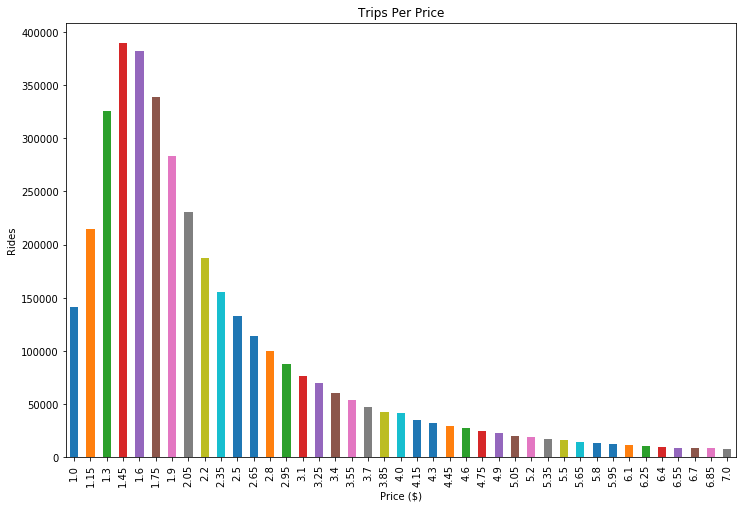

In [222]:
#Plot the frequency of each price below 7.0
vc_price = df['Expected Price'].value_counts()
top_prices = vc_price[:7]
top_prices
price_counts = top_prices.sort_index()
ax1 = price_counts.plot(kind = 'bar', figsize = (12, 8))
ax1.set_title('Trips Per Price')
ax1.set_ylabel('Rides')
ax1.set_xlabel('Price ($)')


In [223]:
#Display the number of trips and the average revenue for each district pair route
prices_by_district_route = df.groupby(['From To District'])['Expected Price'].agg(['mean', 'count'])
prices_by_district_route

,mean,count
From To District,,
0 0,3.003627,16338
0 1,3.329615,1820
0 10,3.633444,151
0 2,3.700000,30
0 3,3.512484,2331
0 4,3.423196,97
0 5,3.635714,1148
0 6,4.771429,7
0 7,3.474534,483


In [224]:
#Display routes with sufficient sample sizes in order of average price

prices_by_district_route = prices_by_district_route.sort_values(by = 'count', ascending = False)

#Only keep routes with more than 1000 rides
top_route_prices = prices_by_district_route[0:38]
top_route_prices = top_route_prices.sort_values(by = 'mean', ascending = False)
print top_route_prices


                      mean    count
From To District                   
9 0               5.887563    10991
9 8               5.336679     8141
8 9               4.930842     5165
3 2               4.661442     1394
3 5               4.572705     4248
9 7               4.353214     2365
5 3               4.287033     3852
9 4               4.172184     3631
9 10              3.953196     8073
7 9               3.890728     1580
9 5               3.842323    54456
10 9              3.746608     5719
5 9               3.745431    41922
5 8               3.699208     4547
0 5               3.635714     1148
0 3               3.512484     2331
4 7               3.423876     1401
4 9               3.421953     2002
7 4               3.411877     1604
8 5               3.390784     4297
9 3               3.355465   113824
0 1               3.329615     1820
3 9               3.200305    99966
8 8               3.114885    11750
3 1               3.099658    16649
1 3               3.042549  

Text(0.5,0,'Route (Start and End District)')

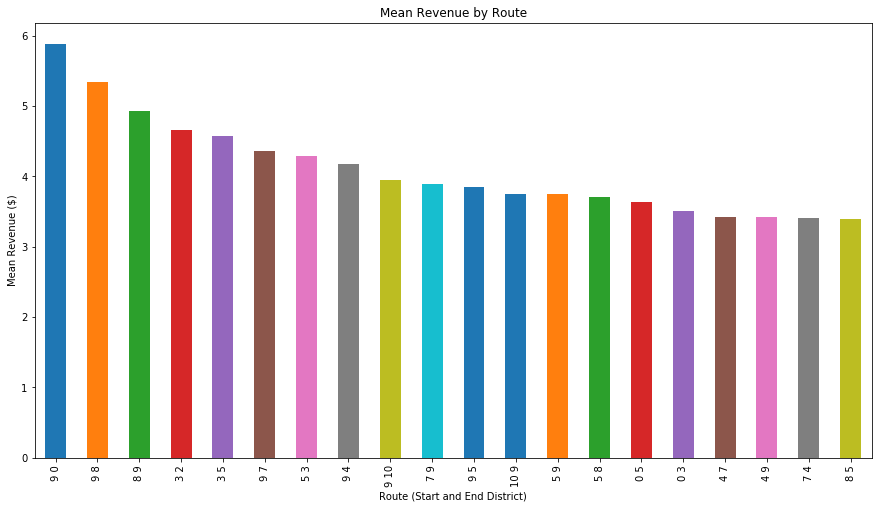

In [111]:
#Plot mean revenue per route
ax1 = top_route_prices['mean'][:20].plot(kind='bar', figsize = (15, 8))
ax1.set_title('Mean Revenue by Route')
ax1.set_ylabel('Mean Revenue ($)')
ax1.set_xlabel('Route (Start and End District)')
#Note - Number 2 and 3 are the route between District 8 and District 9. It could be really beneficial to hit these two areas hard with placement

                      mean    count         total
From To District                                 
9 9               2.445470  2770769  6.775834e+06
3 3               2.545398   221536  5.638974e+05
9 1               2.988986   136865  4.090875e+05
9 3               3.355465   113824  3.819325e+05
1 9               2.913244   114617  3.339073e+05
3 9               3.200305    99966  3.199217e+05
1 1               2.469552   110610  2.731572e+05
5 5               2.628395    80496  2.115753e+05
9 5               3.842323    54456  2.092375e+05
5 9               3.745431    41922  1.570160e+05
7 7               2.946762    31691  9.338585e+04
9 0               5.887563    10991  6.471020e+04
0 9               2.998345    18458  5.534345e+04
3 1               3.099658    16649  5.160620e+04
0 0               3.003627    16338  4.907325e+04
10 10             2.828978    15736  4.451680e+04
1 3               3.042549    14467  4.401655e+04
9 8               5.336679     8141  4.344590e+04


Text(0.5,0,'Route (Start and End District)')

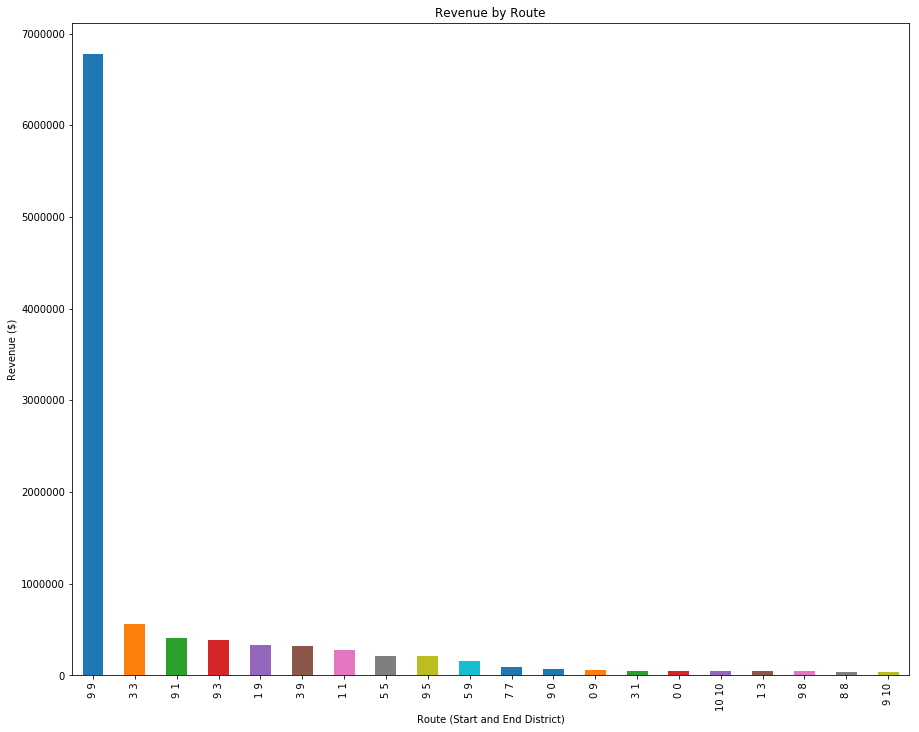

In [129]:
#Determine the total revenue for each route and plot this

prices_by_district_route['total'] = prices_by_district_route['mean'] * prices_by_district_route['count']
top_route_prices = prices_by_district_route.sort_values(by = 'total', ascending = False)[:20]
print top_route_prices
ax1 = top_route_prices['total'].plot(kind='bar', figsize = (15, 12))
ax1.set_title('Revenue by Route')
ax1.set_ylabel('Revenue ($)')
ax1.set_xlabel('Route (Start and End District)')



                      mean    count         total
From To District                                 
9 9               2.445470  2770769  6.775834e+06
3 3               2.545398   221536  5.638974e+05
9 1               2.988986   136865  4.090875e+05
1 9               2.913244   114617  3.339073e+05
9 3               3.355465   113824  3.819325e+05
1 1               2.469552   110610  2.731572e+05
3 9               3.200305    99966  3.199217e+05
5 5               2.628395    80496  2.115753e+05
9 5               3.842323    54456  2.092375e+05
5 9               3.745431    41922  1.570160e+05
7 7               2.946762    31691  9.338585e+04
0 9               2.998345    18458  5.534345e+04
3 1               3.099658    16649  5.160620e+04
0 0               3.003627    16338  4.907325e+04
10 10             2.828978    15736  4.451680e+04
1 3               3.042549    14467  4.401655e+04
8 8               3.114885    11750  3.659990e+04
9 0               5.887563    10991  6.471020e+04


Text(0.5,0,'Route (Start and End District)')

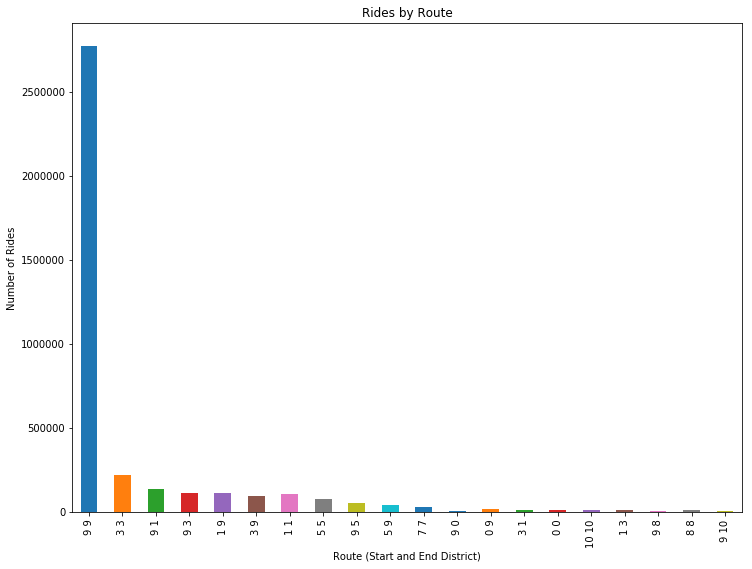

In [104]:
#Plot the routes with the most frequency of rides

top_route_counts = prices_by_district_route.sort_values(by = 'count', ascending = False)[:20]
print top_route_counts
ax1 = top_route_prices['count'].plot(kind='bar', figsize = (12, 9))
ax1.set_title('Rides by Route')
ax1.set_ylabel('Number of Rides')
ax1.set_xlabel('Route (Start and End District)')

In [21]:
#Determine how many trips occur within each 12 hour period
df['Start AM PM'].value_counts()

PM    3075690
AM     897923
Name: Start AM PM, dtype: int64

In [23]:
#Summarize trends for trips in the mornings
morning_mask = df['Start AM PM'] == 'AM'
df_morning = df[morning_mask]
df_morning['Expected Price'].describe()

count    897923.000000
mean          2.393193
std          31.067319
min           1.000000
25%           1.450000
50%           1.750000
75%           2.350000
max       28729.900000
Name: Expected Price, dtype: float64

In [24]:
#Summarize trends for trips in the afternoons and evenings
evening_mask = df['Start AM PM'] == 'PM'
df_evening = df[evening_mask]
df_evening['Expected Price'].describe()

count    3.075690e+06
mean     2.699499e+00
std      5.486659e+00
min     -2.145500e+02
25%      1.450000e+00
50%      2.050000e+00
75%      2.950000e+00
max      4.722700e+03
Name: Expected Price, dtype: float64

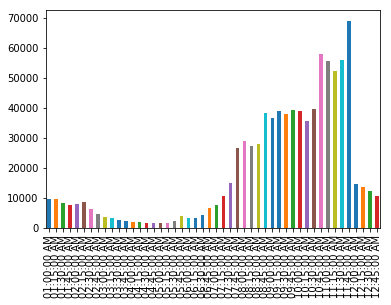

In [49]:
#plot the frequency of trips in the AM based on time

time_counts = df_morning['Start Time Fixed'].value_counts()
morning_time_counts = time_counts.sort_index()
morning_time_counts.plot(kind = 'bar')

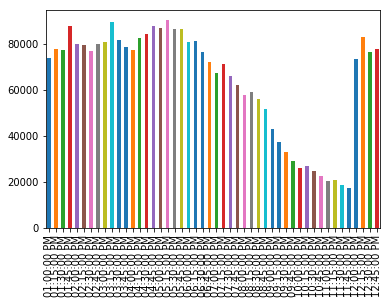

In [51]:
#plot the frequency of trips in the PM based on time


time_counts = df_evening['Start Time Fixed'].value_counts()
evening_time_counts = time_counts.sort_index()
evening_time_counts.plot(kind = 'bar')

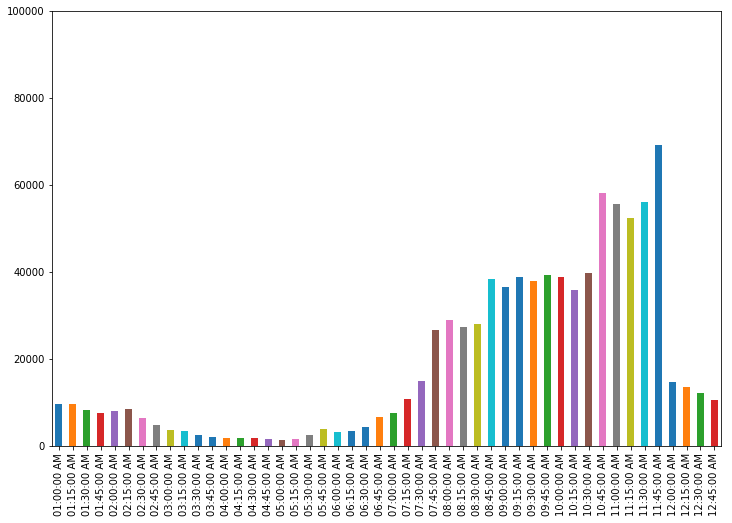

In [63]:
ax1 = morning_time_counts.plot(kind = 'bar', figsize = (12, 8), ylim = (0, 100000))

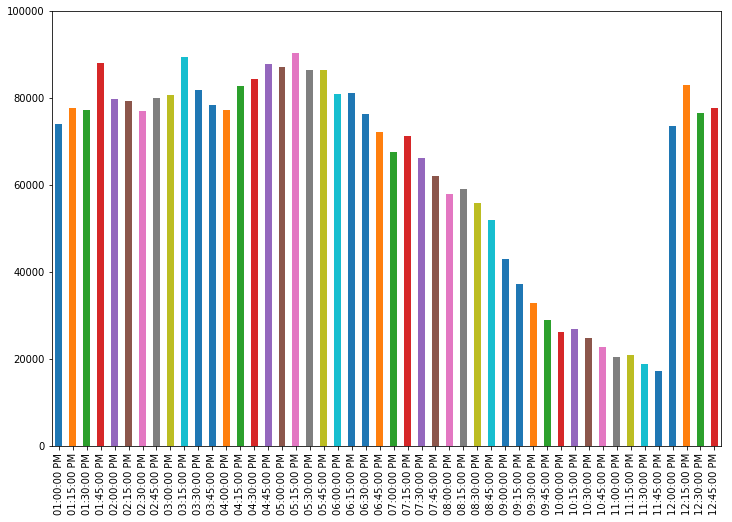

In [64]:
ax2 = evening_time_counts.plot(kind = 'bar', figsize = (12, 8), ylim = (0, 100000))

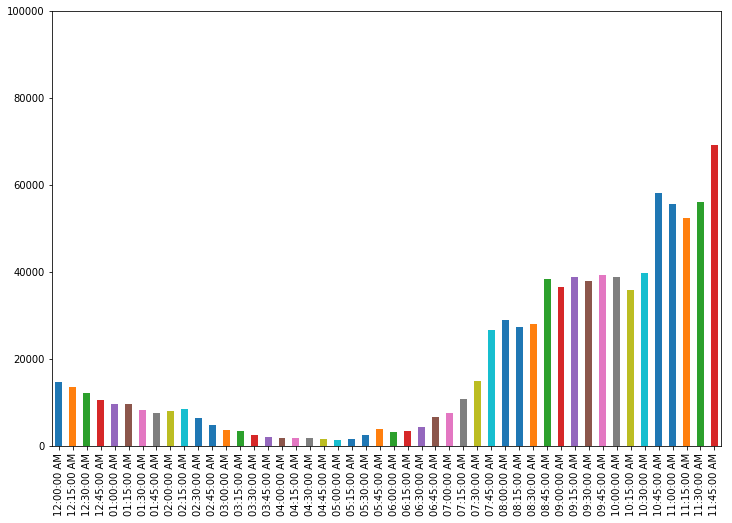

In [68]:
#Correct mis-ordering in the series to properly put all times chronologically

morning_fixed = morning_time_counts[0:-4]
morning_fixed = pd.concat([morning_time_counts[-4:], morning_fixed])
ax1 = morning_fixed.plot(kind = 'bar', figsize = (12, 8), ylim = (0, 100000))

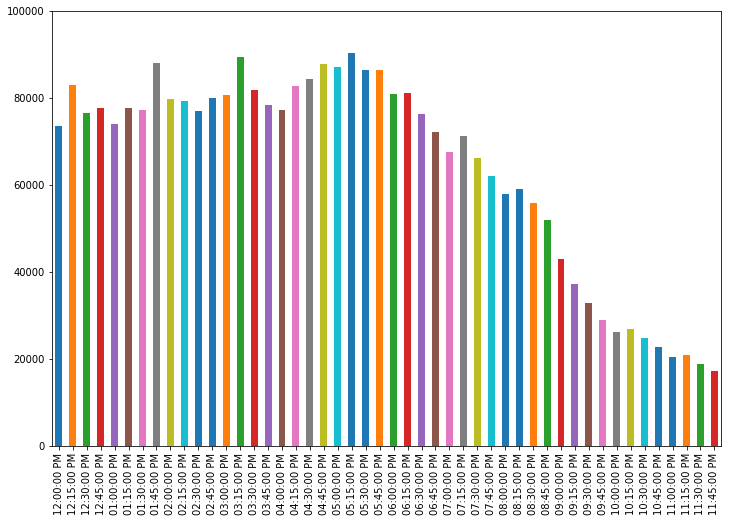

In [69]:
#Correct mis-ordering in the series to properly put all times chronologically

evening_fixed = evening_time_counts[0:-4]
evening_fixed = pd.concat([evening_time_counts[-4:], evening_fixed])
ax1 = evening_fixed.plot(kind = 'bar', figsize = (12, 8), ylim = (0, 100000))

Text(0.5,0,'Time')

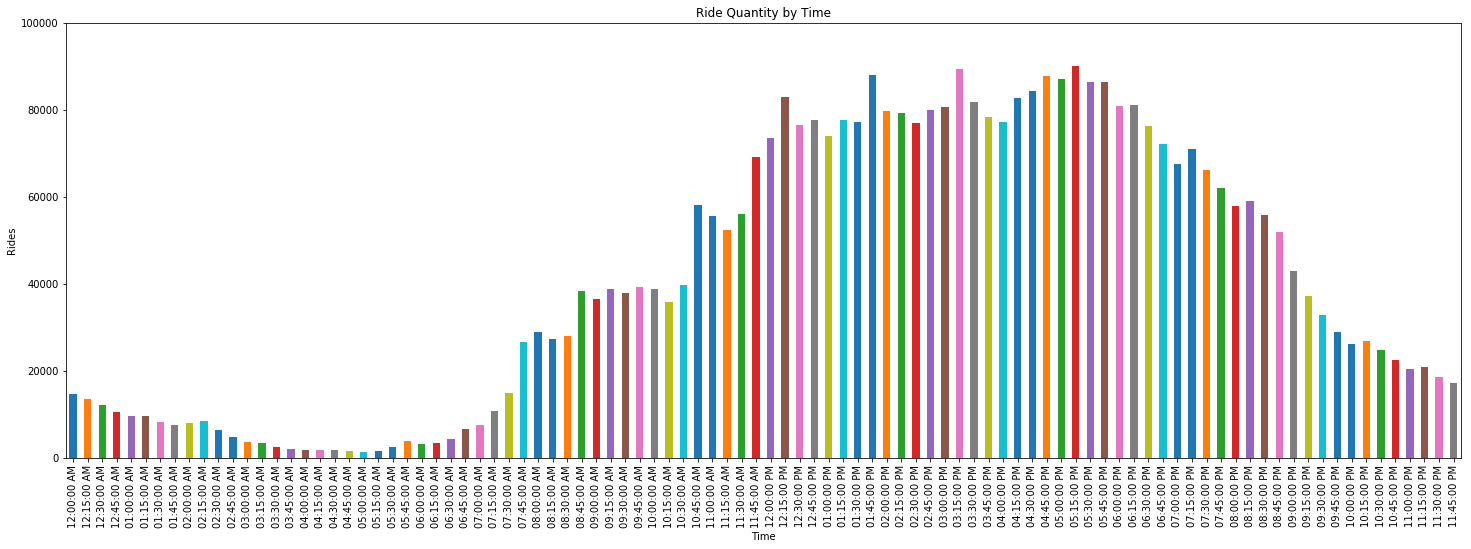

In [184]:
#Combine the AM and PM graphs into one plot of frequency based on time

fullday_fixed = pd.concat([morning_fixed, evening_fixed])
ax1 = fullday_fixed.plot(kind = 'bar', figsize = (25, 8), ylim = (0, 100000))
ax1.set_title('Ride Quantity by Time')
ax1.set_ylabel('Rides')
ax1.set_xlabel('Time')

Text(0.5,0,'Time')

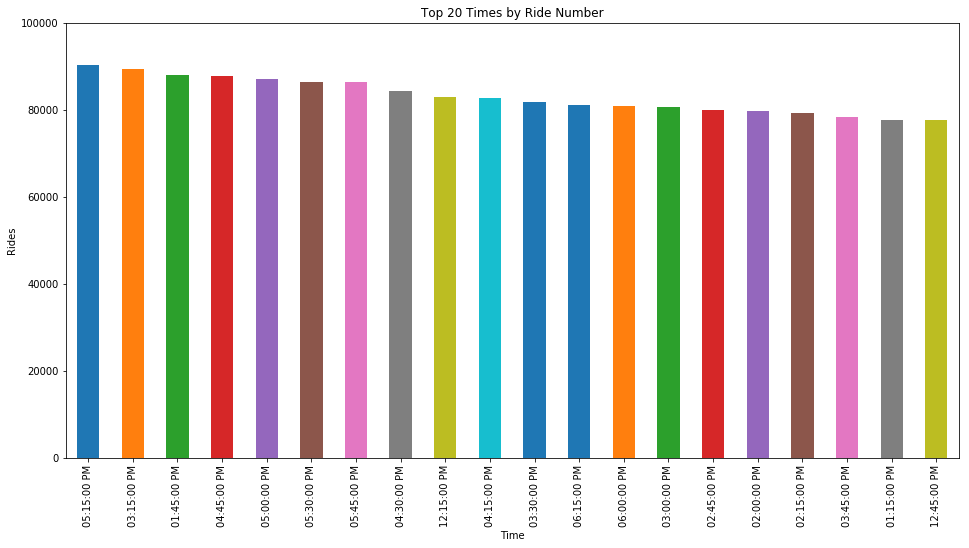

In [84]:
#Plot the most frequent times of day in terms of rides taken

time_peaks = fullday_fixed.sort_values(ascending = False)
time_peaks

top_20_times = time_peaks[:20]
ax1 = top_20_times.plot(kind = 'bar', figsize = (16, 8), ylim = (0, 100000))
ax1.set_title('Top 20 Times by Ride Number')
ax1.set_ylabel('Rides')
ax1.set_xlabel('Time')

In [134]:
#Count how many trips start or end in a certain district
counts_by_district = df['Council District (Start)'].value_counts()
counts_by_district

counts_2 = df['Council District (End)'].value_counts()
counts_2

9     3060475
3      357121
1      267631
5      146026
7       36686
0       30982
8       25750
10      25651
4       16653
2        6120
6         443
Name: Council District (End), dtype: int64

0       72042
1      510295
10      48713
2       11127
3      702747
4       31445
5      278937
6         880
7       72857
8       47854
9     6170179
dtype: int64


Text(0.5,0,'District Number')

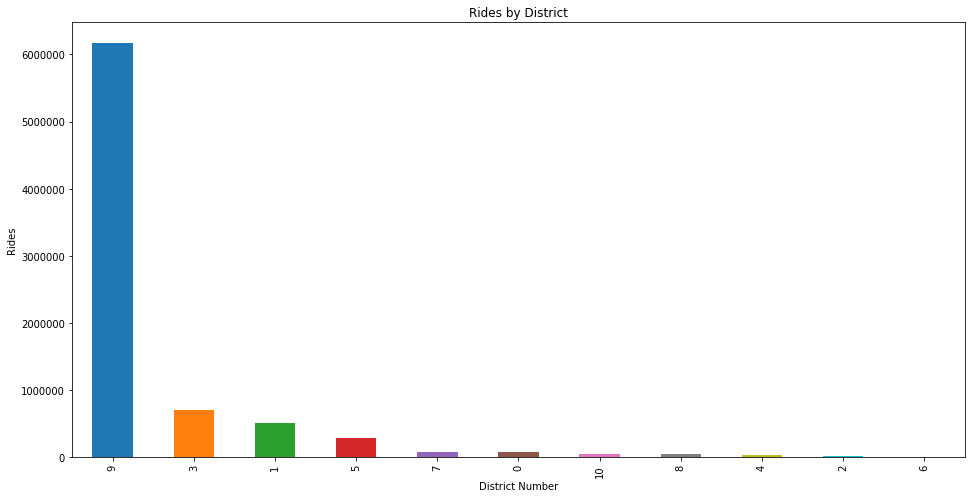

In [130]:
#Combine count how many trips start or end in a certain region

counts_district = counts_by_district + counts_2
print counts_district
ax1 = counts_district.sort_values(ascending = False).plot(kind = 'bar', figsize = (16, 8))
ax1.set_title('Rides by District')
ax1.set_ylabel('Rides')
ax1.set_xlabel('District Number')
#

In [144]:
#Compare the rides of District 3 and District 9

counts_district.sort_index(inplace = True)
print counts_district
#Comparison of District 3 and District 9
ride_pct = float(counts_district[4]) / float(counts_district[10])
print (counts_district[3])
print (counts_district[9])


ride_pct

0       72042
1      510295
10      48713
2       11127
3      702747
4       31445
5      278937
6         880
7       72857
8       47854
9     6170179
dtype: int64
11127
47854


0.11389410258600277

Text(0.5,0,'Month')

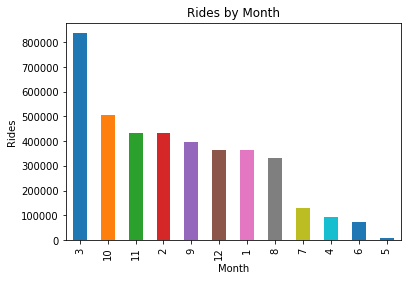

In [147]:
#Plot the number of rides in each month

ax1 = df['Month'].value_counts().plot(kind='bar')
ax1.set_title('Rides by Month')
ax1.set_ylabel('Rides')
ax1.set_xlabel('Month')

In [150]:
#Analyze trends to check for differences between Scooters and Bikes
df['Vehicle Type'].value_counts()

#vt =df['Vehicle Type'].value_counts()
#vt.plot(kind = 'bar')

#average time on scooter vs average time on bike


#time = df['Trip Duration'].value_counts
#time

#avg = df.groupby('Vehicle Type')['Trip Duration'].mean()
#avg

scooter    3817269
bicycle     156344
Name: Vehicle Type, dtype: int64

In [169]:
#Calculate the average price for trips starting in each Council District

avg = df.groupby('Council District (Start)')['Expected Price'].mean()
avg = avg.sort_values(ascending = False)
avg

Council District (Start)
8     3.669680
6     3.190961
2     3.179059
10    3.146551
5     3.104079
0     3.078238
7     3.049225
4     3.012821
3     2.808321
1     2.742685
9     2.556701
Name: Expected Price, dtype: float64

In [173]:
#Calculate percent difference in mean price between District 3 and District 10
(avg[8]/avg[10] - 1) * 100

9.841625755674489

In [178]:
#Determine if trips occur during either the morning or evening commute and add these columns to a new dataframe

df_commute = df
df_commute.head()

def get_morning_commute(hour):
    hour = int(hour)
    return hour >= 8 and hour <=10

def get_evening_commute(hour):
    hour = int(hour)
    return hour >= 16 and hour <=18


df_commute["Morning Commute"] = df_commute["Hour"].map(get_morning_commute)
df_commute["Evening Commute"] = df_commute["Hour"].map(get_evening_commute)
df_commute.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,...,Length Date Time,Start Time Fixed,End Time Fixed,Start AM PM,End AM PM,From To District,Same District,Expected Price,Morning Commute,Evening Commute
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6,17,...,3,05:30:00 PM,05:30:00 PM,PM,PM,5 9,False,1.75,False,True
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11,11,...,3,11:00:00 AM,11:00:00 AM,AM,AM,9 9,True,1.45,False,False
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324,1206,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10,15,...,3,03:15:00 PM,03:30:00 PM,PM,PM,9 9,True,1.75,False,False
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096,0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9,16,...,3,04:45:00 PM,05:00:00 PM,PM,PM,9 9,True,3.70,False,True
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408,1144,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9,11,...,3,11:45:00 AM,11:45:00 AM,AM,AM,3 3,True,1.90,False,False


In [182]:
#Summarize stats for revenue of trips in the morning commute

morning_commute_mask = df_commute['Morning Commute']
morning_commute = df_commute[morning_commute_mask]
print "Number of rides: ", morning_commute['Expected Price'].count()
print "Revenue: $", morning_commute['Expected Price'].sum()
print "Mean Revenue: $", morning_commute['Expected Price'].mean()

Number of rides:  447123
Revenue: $ 992168.6999999998
Mean Revenue: $ 2.21900617951


In [183]:
#Summarize stats for revenue of trips in the evening commute


evening_commute_mask = df_commute['Evening Commute']
evening_commute = df_commute[evening_commute_mask]
print "Number of rides: ", evening_commute['Expected Price'].count()
print "Revenue: $", evening_commute['Expected Price'].sum()
print "Mean Revenue: $", evening_commute['Expected Price'].mean()

Number of rides:  992276
Revenue: $ 2709259.9999999995
Mean Revenue: $ 2.73034921735


In [263]:
#Calculate revenue statistics for each month

revenue_by_month = df.groupby(['Month'])['Expected Price'].agg(['sum', 'mean', 'count'])
revenue_by_month

,sum,mean,count
Month,,,
1,968329.30,2.663011,363622
10,1270821.25,2.505019,507310
11,1170272.60,2.698813,433625
12,931818.20,2.558773,364166
2,1048184.25,2.420889,432975
3,2297285.75,2.742173,837761
4,257334.45,2.721733,94548
5,34988.90,3.788317,9236
6,216065.25,2.969234,72768
